# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from scipy.sparse import hstack

In [ ]:
from prettytable import PrettyTable

In [ ]:
pt = PrettyTable()
pt.field_names = ["Vectorizer", "Model", "Hyperparameter", "AUC"]

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Datasets/preprocessed_data.csv',nrows=100000)

In [ ]:
df.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

X = df.drop('project_is_approved',axis=1)
y = df['project_is_approved']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42,stratify=y)    #stratify is used to proportionally split the classes in train and test

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 8)
(30000, 8)
(70000,)
(30000,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
#BOW vectorizer

bow_vect = CountVectorizer(min_df=10)


x_tr_essay_bow = bow_vect.fit_transform(x_train['essay'])
x_te_essay_bow = bow_vect.transform(x_test['essay'])

print(x_tr_essay_bow.shape)
print(x_te_essay_bow.shape)

(70000, 13974)
(30000, 13974)


In [ ]:
#BOW with parameters

bow_vect_1 = CountVectorizer(min_df=10,ngram_range=(1,3),max_features=2500)

x_tr_essay_bow_1 = bow_vect_1.fit_transform(x_train['essay'])
x_te_essay_bow_1 = bow_vect_1.transform(x_test['essay'])

print(x_tr_essay_bow_1.shape)
print(x_te_essay_bow_1.shape)

(70000, 2500)
(30000, 2500)


In [ ]:
#TFIDF vectorizer

tfidf_vect = TfidfVectorizer(min_df=10)

x_tr_essay_tfidf = tfidf_vect.fit_transform(x_train['essay'])
x_te_essay_tfidf = tfidf_vect.transform(x_test['essay'])

print(x_tr_essay_tfidf.shape)
print(x_te_essay_tfidf.shape)

(70000, 13974)
(30000, 13974)


In [ ]:
#TFIDF with params

tfidf_vect_1 = TfidfVectorizer(min_df=10,ngram_range=(1,3),max_features=2500)

x_tr_essay_tfidf_1 = tfidf_vect_1.fit_transform(x_train['essay'])
x_te_essay_tfidf_1 = tfidf_vect_1.transform(x_test['essay'])

print(x_tr_essay_tfidf_1.shape)
print(x_te_essay_tfidf_1.shape)

(70000, 2500)
(30000, 2500)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
#Encoding categorical values

vect_ohe = CountVectorizer()       #vectorizer for one hot encoding (ohe)

# for i in categorical:
#     var = compile("'x_train_' + i", "<string>", "eval") 
#     name = eval(var)
#     print(name)
#     name  = vect_ohe.fit_transform(x_train[i].values)
#     # compile('x_test_' + i) = vect_ohe.transform(x_test[i].values)


x_train_state = vect_ohe.fit_transform(x_train['school_state'].values)
x_test_state = vect_ohe.transform(x_test['school_state'].values)

x_train_teacher = vect_ohe.fit_transform(x_train['teacher_prefix'].values)
x_test_teacher = vect_ohe.transform(x_test['teacher_prefix'].values)

x_train_grade = vect_ohe.fit_transform(x_train['project_grade_category'].values)
x_test_grade = vect_ohe.transform(x_test['project_grade_category'].values)

x_train_clean = vect_ohe.fit_transform(x_train['clean_categories'].values)
x_test_clean = vect_ohe.transform(x_test['clean_categories'].values)

x_train_clean_sub = vect_ohe.fit_transform(x_train['clean_subcategories'].values)
x_test_clean_sub = vect_ohe.transform(x_test['clean_subcategories'].values)

# Normalizing numerical features

normalizer = Normalizer()

x_train_price= normalizer.fit_transform(x_train['price'].values.reshape(1,-1))
x_test_price= normalizer.fit_transform(x_test['price'].values.reshape(1,-1))

x_train_teacher_ppp = normalizer.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_ppp = normalizer.fit_transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))



In [ ]:
x_train_teacher_ppp

array([[0.0001304 , 0.00078238, 0.00078238, ..., 0.00247754, 0.00039119,
        0.00143437]])

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

###MODEL - 1 : BOW w/ no params

In [ ]:
# Concatenating all data

x_tr_bow = hstack(( x_train_state, x_train_teacher, x_train_grade, x_train_clean_sub,x_train_clean,x_train_price.T,x_train_teacher_ppp.T,x_tr_essay_bow)).tocsr()
x_te_bow = hstack(( x_test_state, x_test_teacher, x_test_grade, x_test_clean_sub,x_test_clean,x_test_price.T,x_test_teacher_ppp.T,x_te_essay_bow)).tocsr()


In [ ]:
x_tr_bow.shape , x_te_bow.shape


((70000, 14075), (30000, 14075))

In [ ]:
nb = MultinomialNB()

In [ ]:
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100],'class_prior':[[0.5,0.5],None]}

In [ ]:
cross_val_score(nb,X_tr_bow,y_train,scoring='roc_auc',cv=5,n_jobs=-1)

In [ ]:
clf = GridSearchCV(nb,param_grid=parameters,cv=3,scoring='roc_auc',n_jobs=-1,return_train_score=True)

In [ ]:
clf.fit(x_tr_bow, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'class_prior': [[0.5, 0.5], None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.149364,0.026317,0.043532,0.002191,1e-05,"[0.5, 0.5]","{'alpha': 1e-05, 'class_prior': [0.5, 0.5]}",0.661612,0.671571,0.666763,0.666649,0.004067,22,0.837396,0.836387,0.835926,0.836570,0.000614
1,0.115425,0.005703,0.043348,0.000350,1e-05,None,"{'alpha': 1e-05, 'class_prior': None}",0.661581,0.671586,0.666792,0.666653,0.004086,21,0.837388,0.836387,0.835923,0.836566,0.000611
2,0.108981,0.000894,0.043677,0.000498,0.0005,"[0.5, 0.5]","{'alpha': 0.0005, 'class_prior': [0.5, 0.5]}",0.673852,0.683859,0.678468,0.678726,0.004089,15,0.833266,0.831702,0.831620,0.832196,0.000757
3,0.106182,0.002394,0.043840,0.001203,0.0005,None,"{'alpha': 0.0005, 'class_prior': None}",0.673859,0.683845,0.678474,0.678726,0.004081,16,0.833262,0.831702,0.831619,0.832194,0.000756
4,0.116246,0.011994,0.044866,0.000962,0.0001,"[0.5, 0.5]","{'alpha': 0.0001, 'class_prior': [0.5, 0.5]}",0.668251,0.678366,0.673216,0.673278,0.004130,19,0.835461,0.834166,0.833883,0.834504,0.000687


In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.5, 'class_prior': None}
0.6998824874746172


In [ ]:
def plot_graph(results):
    train_auc= results['mean_train_score']
    train_auc_std= results['std_train_score']
    cv_auc = results['mean_test_score'] 
    cv_auc_std= results['std_test_score']
    alpha =  results['param_alpha'].astype('float')
    alpha = np.array(alpha)
    alpha1 = np.log10(alpha)
    print(np.max(cv_auc))

    plt.plot(alpha1, train_auc, label='Train AUC')
    plt.plot(alpha1, cv_auc, label='CV AUC')

    plt.scatter(alpha1, train_auc, label='Train AUC points')
    plt.scatter(alpha1, cv_auc, label='CV AUC points')

    plt.legend()
    plt.xlabel("Alpha: hyperparameter in log scale")
    plt.ylabel("AUC")
    plt.title("Hyper parameter Vs AUC plot")
    plt.grid()
    plt.show()

0.6998824874746172


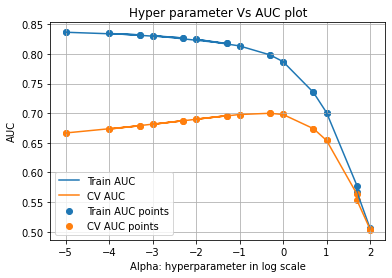

In [ ]:
plot_graph(results)

In [ ]:
#Best Model

mnb_bow = MultinomialNB(alpha=clf.best_params_['alpha'],class_prior=clf.best_params_['class_prior'])


In [ ]:
mnb_bow = MultinomialNB(alpha=0.5,class_prior=None)

In [ ]:
mnb_bow.fit(x_tr_bow,y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [ ]:
y_train_pred_bow = []
y_test_pred_bow = []
y_train_pred_bow = mnb_bow.predict_proba(x_tr_bow)[:,1]
y_test_pred_bow = mnb_bow.predict_proba(x_te_bow)[:,1]

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_bow)

In [ ]:
pt.add_row('BOW','MNB',f'{clf.best_params_}',auc(test_fpr, test_tpr))

In [ ]:
# pt.add_row(['BOW','MNB','alpha: 0.5, class_prior: None',auc(test_fpr, test_tpr)])

In [ ]:
def plot_roc_auc(y_train,y_test,y_train_pred,y_test_pred):

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("Alpha: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

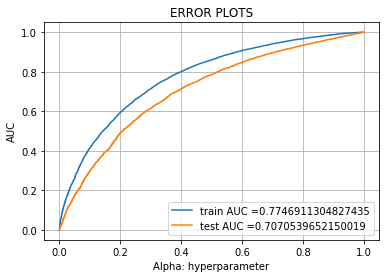

In [ ]:
plot_roc_auc(y_train,y_test,y_train_pred_bow,y_test_pred_bow)

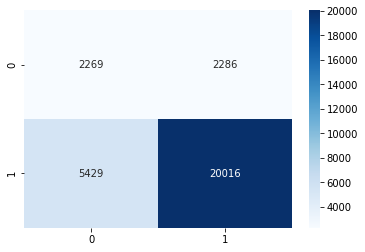

In [ ]:
#Confusion matrix
y_test_pred_bow_class = mnb_bow.predict(x_te_bow)
conf_matrix_bow = confusion_matrix(y_test,y_test_pred_bow_class)

sns.heatmap(conf_matrix_bow,annot=True,fmt="d",cmap='Blues')

In [ ]:
top_20_features = mnb_bow.feature_log_prob_[1].sort()

##MODEL -II - TFIDF

In [ ]:
x_tr_tfidf = hstack(( x_train_state, x_train_teacher, x_train_grade, x_train_clean_sub,x_train_clean,x_train_price.T,x_train_teacher_ppp.T,x_tr_essay_tfidf)).tocsr()
x_te_tfidf = hstack(( x_test_state, x_test_teacher, x_test_grade, x_test_clean_sub,x_test_clean,x_test_price.T,x_test_teacher_ppp.T,x_te_essay_tfidf)).tocsr()


In [ ]:
x_tr_tfidf.shape , x_te_tfidf.shape


((70000, 14075), (30000, 14075))

In [ ]:
#rest all params and Grid search initialization is same, hencr directly fitting the model with tfidf data

clf.fit(x_tr_tfidf, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'class_prior': [[0.5, 0.5], None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.130386,0.020343,0.047452,0.006240,1e-05,"[0.5, 0.5]","{'alpha': 1e-05, 'class_prior': [0.5, 0.5]}",0.640141,0.647871,0.643176,0.643730,0.003180,17,0.830679,0.831029,0.831070,0.830926,0.000176
1,0.110124,0.006038,0.044276,0.000826,1e-05,None,"{'alpha': 1e-05, 'class_prior': None}",0.640141,0.647871,0.643176,0.643730,0.003180,17,0.830679,0.831029,0.831070,0.830926,0.000176
2,0.111623,0.005434,0.044616,0.001116,0.0005,"[0.5, 0.5]","{'alpha': 0.0005, 'class_prior': [0.5, 0.5]}",0.653257,0.660694,0.654959,0.656303,0.003182,11,0.825197,0.825049,0.825792,0.825346,0.000321
3,0.110976,0.004130,0.044926,0.001059,0.0005,None,"{'alpha': 0.0005, 'class_prior': None}",0.653257,0.660694,0.654959,0.656303,0.003182,11,0.825197,0.825049,0.825792,0.825346,0.000321
4,0.110860,0.008554,0.045138,0.000322,0.0001,"[0.5, 0.5]","{'alpha': 0.0001, 'class_prior': [0.5, 0.5]}",0.646869,0.654711,0.649249,0.650276,0.003283,13,0.828262,0.828360,0.828727,0.828450,0.000200


In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.05, 'class_prior': [0.5, 0.5]}
0.6733712865198728


0.6733712865198728


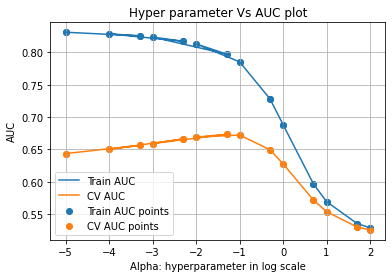

In [ ]:
plot_graph(results)

In [ ]:
mnb_tfidf = MultinomialNB(alpha=clf.best_params_['alpha'],class_prior=clf.best_params_['class_prior'])

In [ ]:
mnb_tfidf = MultinomialNB(alpha=0.05,class_prior=[0.5,0.5])

In [ ]:
mnb_tfidf.fit(x_tr_tfidf,y_train)

MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5], fit_prior=True)

In [ ]:
y_train_pred_tfidf = []
y_test_pred_tfidf = []
y_train_pred_tfidf = mnb_tfidf.predict_proba(x_tr_tfidf)[:,1]
y_test_pred_tfidf = mnb_tfidf.predict_proba(x_te_tfidf)[:,1]

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tfidf)


In [ ]:
pt.add_row('TFIDF','MNB',f'{clf.best_params_}',auc(test_fpr, test_tpr))

In [ ]:
# pt.add_row(['TFIDF','MNB','alpha: 0.05, class_prior:[0.5,0.5]',auc(test_fpr, test_tpr)])

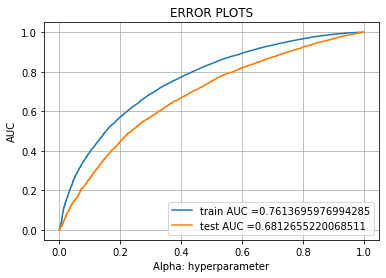

In [ ]:
plot_roc_auc(y_train,y_test,y_train_pred_tfidf,y_test_pred_tfidf)

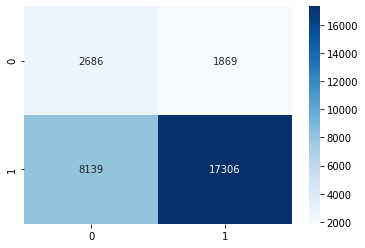

In [ ]:
#Confusion matrix
y_test_pred_tfidf_class = mnb_tfidf.predict(x_te_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test,y_test_pred_tfidf_class)

sns.heatmap(conf_matrix_tfidf,annot=True,fmt="d",cmap='Blues')

##MODEL - III - BOW w/ ngrams 

In [ ]:
x_tr_bow_1 = hstack(( x_train_state, x_train_teacher, x_train_grade, x_train_clean_sub,x_train_clean,x_train_price.T,x_train_teacher_ppp.T,x_tr_essay_bow_1)).tocsr()
x_te_bow_1 = hstack(( x_test_state, x_test_teacher, x_test_grade, x_test_clean_sub,x_test_clean,x_test_price.T,x_test_teacher_ppp.T,x_te_essay_bow_1)).tocsr()


In [ ]:
#rest all params and Grid search initialization is same, hencr directly fitting the model with tfidf data

clf.fit(x_tr_bow_1, y_train)    


In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.159992,0.028290,0.045532,0.000578,1e-05,"[0.5, 0.5]","{'alpha': 1e-05, 'class_prior': [0.5, 0.5]}",0.679645,0.68879,0.684747,0.684394,0.003742,5,0.710209,0.705612,0.70984,0.708554,0.002086
1,0.120678,0.003788,0.047276,0.003406,1e-05,None,"{'alpha': 1e-05, 'class_prior': None}",0.679646,0.68879,0.684747,0.684394,0.003742,2,0.710209,0.705612,0.70984,0.708554,0.002085
2,0.117748,0.007289,0.044521,0.000797,0.0005,"[0.5, 0.5]","{'alpha': 0.0005, 'class_prior': [0.5, 0.5]}",0.679645,0.68879,0.684747,0.684394,0.003742,6,0.710209,0.705612,0.70984,0.708554,0.002085
3,0.112221,0.001487,0.044418,0.000678,0.0005,None,"{'alpha': 0.0005, 'class_prior': None}",0.679645,0.68879,0.684747,0.684394,0.003742,3,0.710209,0.705612,0.70984,0.708554,0.002085
4,0.107492,0.000633,0.045846,0.001007,0.0001,"[0.5, 0.5]","{'alpha': 0.0001, 'class_prior': [0.5, 0.5]}",0.679645,0.68879,0.684747,0.684394,0.003742,4,0.710209,0.705612,0.70984,0.708554,0.002085


In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 0.0001, 'class_prior': None}
0.6843943150689302


0.6843943150689302


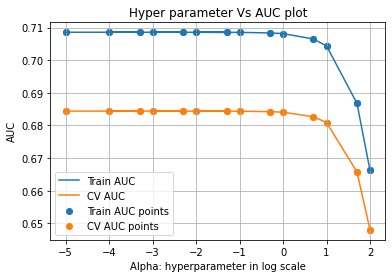

In [ ]:
plot_graph(results)

In [ ]:
mnb_bow_1 = MultinomialNB(alpha=clf.best_params_['alpha'],class_prior=clf.best_params_['class_prior'])

In [ ]:
mnb_bow_1 = MultinomialNB(alpha=0.0001,class_prior=None)

In [ ]:
mnb_bow_1.fit(x_tr_bow_1,y_train)

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [ ]:
y_train_pred_bow_1 = []
y_test_pred_bow_1 = []
y_train_pred_bow_1 = mnb_bow_1.predict_proba(x_tr_bow_1)[:,1]
y_test_pred_bow_1 = mnb_bow_1.predict_proba(x_te_bow_1)[:,1]

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_bow_1)

In [ ]:
pt.add_row('BOW w/params','MNB',f'{clf.best_params_}',auc(test_fpr, test_tpr))

In [ ]:
# pt.add_row(['BOW w/params','MNB','alpha: 0.0001, class_prior:None',auc(test_fpr, test_tpr)])

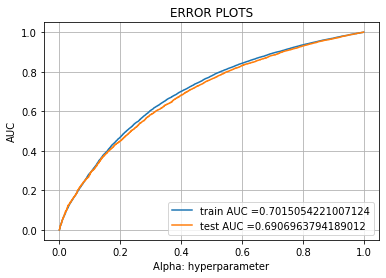

In [ ]:
plot_roc_auc(y_train,y_test,y_train_pred_bow_1,y_test_pred_bow_1)

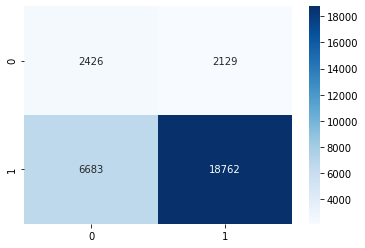

In [ ]:
#Confusion matrix
y_test_pred_bow_class_1 = mnb_bow_1.predict(x_te_bow_1)
conf_matrix_bow_1 = confusion_matrix(y_test,y_test_pred_bow_class_1)

sns.heatmap(conf_matrix_bow_1,annot=True,fmt="d",cmap='Blues')

##MODEL - IV - TFIDF w/ ngrams

In [ ]:
x_tr_tfidf_1 = hstack(( x_train_state, x_train_teacher, x_train_grade, x_train_clean_sub,x_train_clean,x_train_price.T,x_train_teacher_ppp.T,x_tr_essay_tfidf_1)).tocsr()
x_te_tfidf_1 = hstack(( x_test_state, x_test_teacher, x_test_grade, x_test_clean_sub,x_test_clean,x_test_price.T,x_test_teacher_ppp.T,x_te_essay_tfidf_1)).tocsr()


In [ ]:
clf.fit(x_tr_tfidf_1, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'class_prior': [[0.5, 0.5], None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [ ]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.144841,0.009802,0.049042,0.003712,1e-05,"[0.5, 0.5]","{'alpha': 1e-05, 'class_prior': [0.5, 0.5]}",0.656541,0.662548,0.660945,0.660011,0.00254,1,0.686835,0.682183,0.688029,0.685682,0.002522


In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 1e-05, 'class_prior': [0.5, 0.5]}
0.6600113445488116


0.6600113445488116


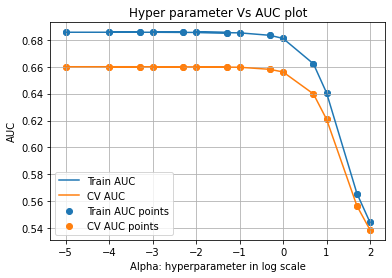

In [ ]:
plot_graph(results)

In [ ]:
mnb_tfidf_1 = MultinomialNB(alpha=clf.best_params_['alpha'],class_prior=clf.best_params_['class_prior'])

In [ ]:
mnb_tfidf_1 = MultinomialNB(alpha=0.00001,class_prior=[0.5,0.5])

In [ ]:
mnb_tfidf_1.fit(x_tr_tfidf_1,y_train)

MultinomialNB(alpha=1e-05, class_prior=[0.5, 0.5], fit_prior=True)

In [ ]:
y_train_pred_tfidf_1 = []
y_test_pred_tfidf_1 = []
y_train_pred_tfidf_1 = mnb_tfidf_1.predict_proba(x_tr_tfidf_1)[:,1]
y_test_pred_tfidf_1 = mnb_tfidf_1.predict_proba(x_te_tfidf_1)[:,1]

In [ ]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_tfidf_1)

In [ ]:
pt.add_row('TFIDF w/params','MNB',f'{clf.best_params_}',auc(test_fpr, test_tpr))

In [ ]:
# pt.add_row(['TFIDF w/params','MNB','alpha: 0.00001, class_prior:[0.5,0.5]',auc(test_fpr, test_tpr)])

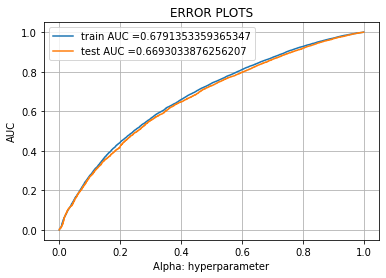

In [ ]:
plot_roc_auc(y_train,y_test,y_train_pred_tfidf_1,y_test_pred_tfidf_1)

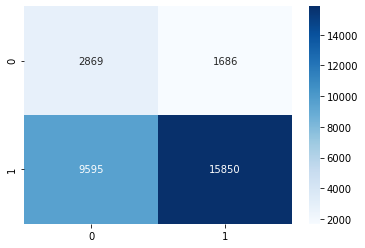

In [ ]:
#Confusion matrix
y_test_pred_tfidf_class_1 = mnb_tfidf_1.predict(x_te_tfidf_1)
conf_matrix_tfidf_1 = confusion_matrix(y_test,y_test_pred_tfidf_class_1)

sns.heatmap(conf_matrix_tfidf_1,annot=True,fmt="d",cmap='Blues')

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

#Top 20 features of BOW model w/ ngrams

In [ ]:
top_20_features = np.sort(mnb_bow_1.feature_log_prob_[1])

In [ ]:
top_20_features[::-1][:20]

array([-3.08617726, -4.23543489, -4.54107962, -4.58970693, -4.61905127,
       -4.84692181, -4.88747159, -4.8881258 , -4.91634044, -4.93491638,
       -4.96569078, -5.10342267, -5.12757793, -5.16505156, -5.23783517,
       -5.24149626, -5.24348082, -5.29130996, -5.39929495, -5.41913008])

#Pretty table

In [ ]:
print(pt)

+----------------+-------+---------------------------------------+--------------------+
|   Vectorizer   | Model |             Hyperparameter            |        AUC         |
+----------------+-------+---------------------------------------+--------------------+
|      BOW       |  MNB  |     alpha: 0.5, class_prior: None     | 0.7070539652150019 |
|     TFIDF      |  MNB  |   alpha: 0.05, class_prior:[0.5,0.5]  | 0.7070539652150019 |
|  BOW w/params  |  MNB  |    alpha: 0.0001, class_prior:None    | 0.6906963794189012 |
| TFIDF w/params |  MNB  | alpha: 0.00001, class_prior:[0.5,0.5] | 0.6693033876256207 |
+----------------+-------+---------------------------------------+--------------------+
